# Model training | Benchmarking | Check Overfitting - without cross validation and tunning

Training Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.78      1.00      0.88         7
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         4
           7       1.00      0.86      0.92         7
           8       0.50      0.75      0.60         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         2
          17 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for Neural Network:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.88      1.00      0.93         7
           3       1.00      0.40      0.57         5
           4       1.00      0.88      0.93         8
           5       0.50      0.50      0.50         4
           6       0.67      0.50      0.57         4
           7       1.00      1.00      1.00         7
           8       0.20      0.25      0.22         4
           9       1.00      1.00      1.00         4
          10       0.75      1.00      0.86         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.60      0.75         5
          16       0.67      1.00      0.80         2
          17       0.60      0.60     

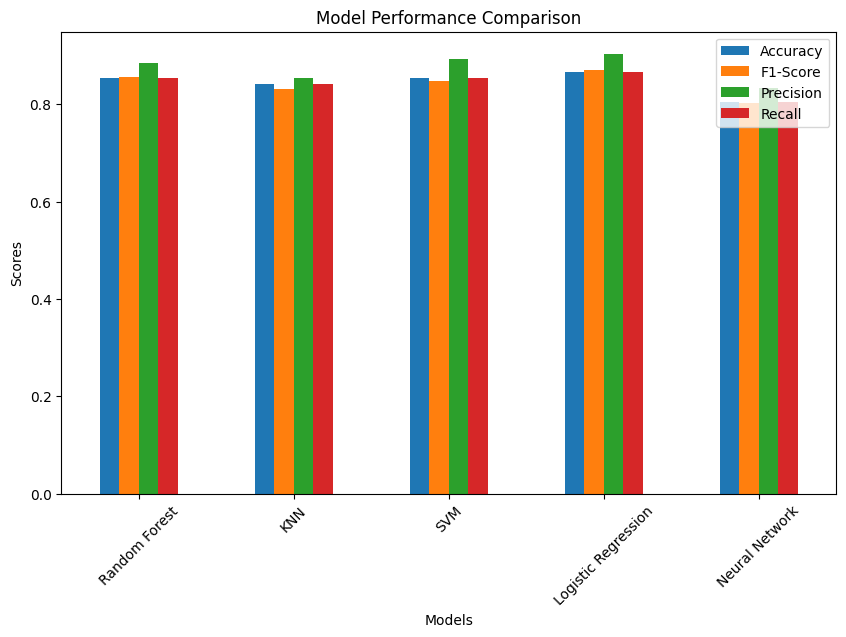


Best model (Logistic Regression) Overfitting
Best model (Logistic Regression) Training Accuracy: 0.9908
Best model (Logistic Regression) Testing Accuracy: 0.8659


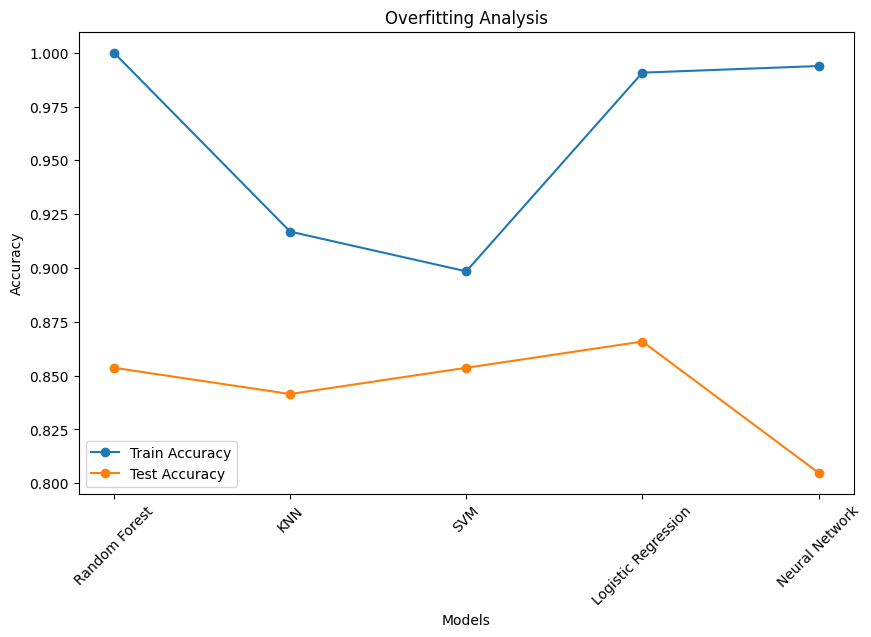

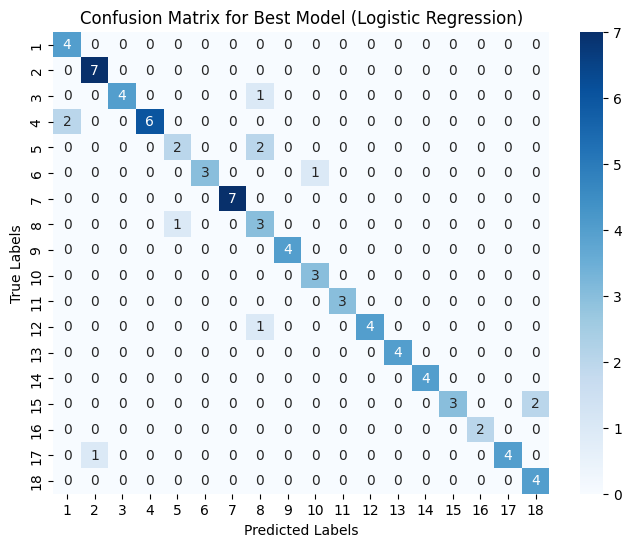

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Import for Neural Network

# Load SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')

target_column = 'LABEL'

# Split features and target for SSL dataset
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)  # Neural Network model
}

# Store results
model_performance = {}

# Train models and evaluate performance
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    model_performance[model_name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("=" * 60)

# Convert performance dictionary to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison Table:")
print(performance_df)

# Benchmarking best models
best_model_f1 = max(model_performance, key=lambda x: model_performance[x]['F1-Score'])
best_model_acc = max(model_performance, key=lambda x: model_performance[x]['Accuracy'])

print(f"\nBest Model Based on F1-Score: {best_model_f1} with F1-Score: {model_performance[best_model_f1]['F1-Score']:.4f}")
print(f"Best Model Based on Accuracy: {best_model_acc} with Accuracy: {model_performance[best_model_acc]['Accuracy']:.4f}")

# Plot metrics
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "F1-Score", "Precision", "Recall"])
plt.xticks(rotation=45)
plt.show()

# Check for Overfitting
train_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracies[model_name] = accuracy_score(y_train, train_pred)
    test_accuracies[model_name] = accuracy_score(y_test, test_pred)

# Get best model's training and testing accuracy
best_model = best_model_f1
best_train_acc = train_accuracies[best_model]
best_test_acc = test_accuracies[best_model]

overfitting_status = "Overfitting" if best_train_acc - best_test_acc > 0.1 else "Not Overfitting"
print(f"\nBest model ({best_model}) {overfitting_status}")
print(f"Best model ({best_model}) Training Accuracy: {best_train_acc:.4f}")
print(f"Best model ({best_model}) Testing Accuracy: {best_test_acc:.4f}")

# Plot Overfitting Representation
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies.keys(), train_accuracies.values(), label='Train Accuracy', marker='o')
plt.plot(test_accuracies.keys(), test_accuracies.values(), label='Test Accuracy', marker='o')
plt.title("Overfitting Analysis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot Confusion Matrix for Best Model
best_model_instance = models[best_model]
y_best_pred = best_model_instance.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_ssl), yticklabels=np.unique(y_ssl))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Best Model ({best_model})')
plt.show()


# Model training | Benchmarking | Hyperperameter tunning | check Overfitting - without cross validation

Training Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.78      1.00      0.88         7
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         4
           7       1.00      0.86      0.92         7
           8       0.50      0.75      0.60         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         2
          17 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       0.88      1.00      0.93         7
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8
           5       0.67      0.50      0.57         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         7
           8       0.43      0.75      0.55         4
           9       1.00      1.00      1.00         4
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         2
          17       1.00      0.80

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for Neural Network:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.88      1.00      0.93         7
           3       1.00      0.40      0.57         5
           4       1.00      0.88      0.93         8
           5       0.50      0.50      0.50         4
           6       0.67      0.50      0.57         4
           7       1.00      1.00      1.00         7
           8       0.20      0.25      0.22         4
           9       1.00      1.00      1.00         4
          10       0.75      1.00      0.86         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.60      0.75         5
          16       0.67      1.00      0.80         2
          17       0.60      0.60     

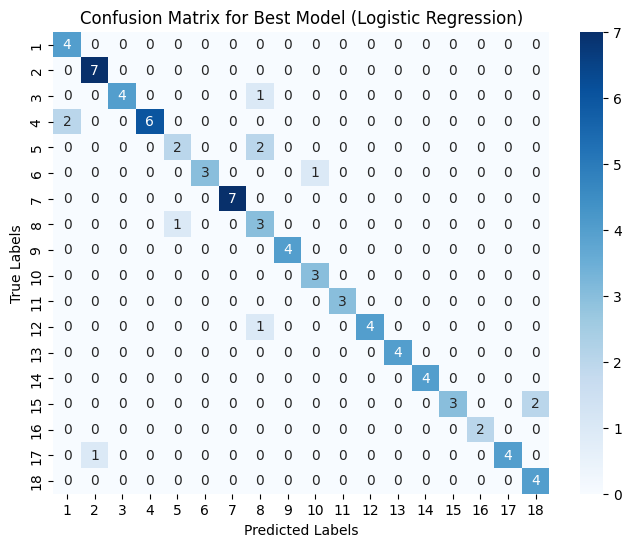

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}

Best Model (Logistic Regression) Overfitting Analysis:
Logistic Regression Training Accuracy: 0.9815
Logistic Regression Testing Accuracy: 0.8659
Logistic Regression is Overfitting 🚨


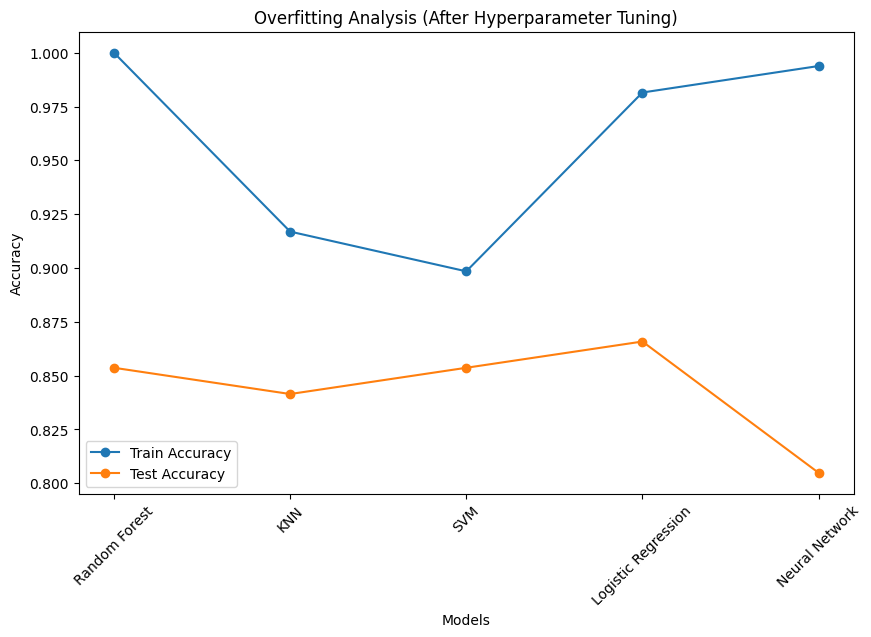

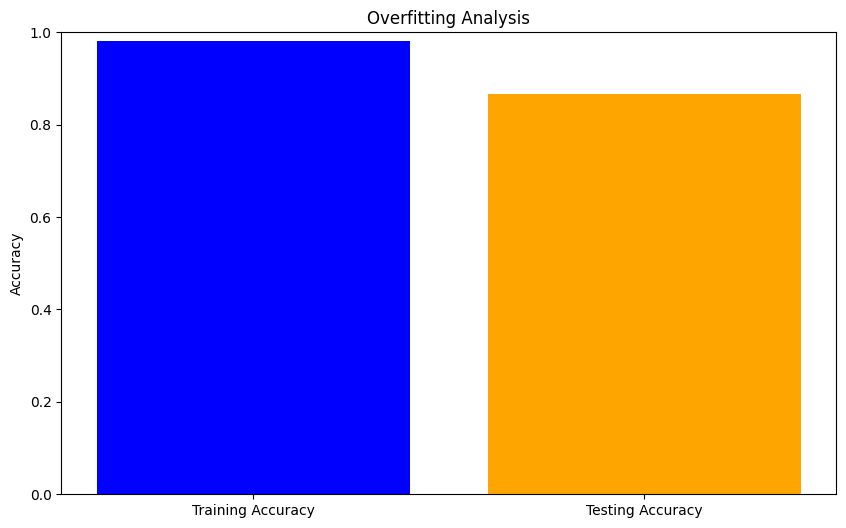

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Import for Neural Network

# Load SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')

target_column = 'LABEL'

# Split features and target for SSL dataset
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)  # Neural Network model
}

# Store results
model_performance = {}

# Train models and evaluate performance
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    model_performance[model_name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("=" * 60)

# Convert performance dictionary to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison Table:")
print(performance_df)

# Benchmarking best models
best_model_f1 = max(model_performance, key=lambda x: model_performance[x]['F1-Score'])
print(f"\nBest Model Based on F1-Score: {best_model_f1} with F1-Score: {model_performance[best_model_f1]['F1-Score']:.4f}")

# Plot Confusion Matrix for Best Model
y_best_pred = models[best_model_f1].predict(X_test)
conf_matrix = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_ssl), yticklabels=np.unique(y_ssl))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Best Model ({best_model_f1})')
plt.show()

# Hyperparameter tuning for the best model
if best_model_f1 == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['lbfgs', 'liblinear'],  # Solver options
        'max_iter': [100, 200, 500]  # Maximum iterations
    }
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model_instance = grid_search.best_estimator_
    print(f"\nBest Hyperparameters for {best_model_f1}: {grid_search.best_params_}")
else:
    best_model_instance = models[best_model_f1]

# Retrain best model with optimal hyperparameters
best_model_instance.fit(X_train, y_train)
train_acc_best = best_model_instance.score(X_train, y_train)
test_acc_best = best_model_instance.score(X_test, y_test)

# Print overfitting analysis
print(f"\nBest Model ({best_model_f1}) Overfitting Analysis:")
print(f"{best_model_f1} Training Accuracy: {train_acc_best:.4f}")
print(f"{best_model_f1} Testing Accuracy: {test_acc_best:.4f}")
if train_acc_best - test_acc_best > 0.1:
    print(f"{best_model_f1} is Overfitting 🚨")
else:
    print(f"{best_model_f1} is Not Overfitting ✅")

# Plot Overfitting Representation (After Hyperparameter Tuning)
train_accuracies[best_model_f1] = train_acc_best
test_accuracies[best_model_f1] = test_acc_best

plt.figure(figsize=(10, 6))
plt.plot(list(train_accuracies.keys()), list(train_accuracies.values()), label='Train Accuracy', marker='o')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label='Test Accuracy', marker='o')
plt.title("Overfitting Analysis (After Hyperparameter Tuning)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot Overfitting Representation
plt.figure(figsize=(10, 6))
plt.bar(["Training Accuracy", "Testing Accuracy"], [best_train_acc, best_test_acc], color=['blue', 'orange'])
plt.title("Overfitting Analysis")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# Reducing overfitting using smallest accuracy gap with cross validation.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


✅ Best Model Selected Based on Smallest Accuracy Gap: KNN

✅ Best Hyperparameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}

📌 Overfitting Analysis After Fixing:
KNN Training Accuracy: 0.8862
KNN Testing Accuracy: 0.8659
✅ Overfitting is reduced. Model is well-balanced.


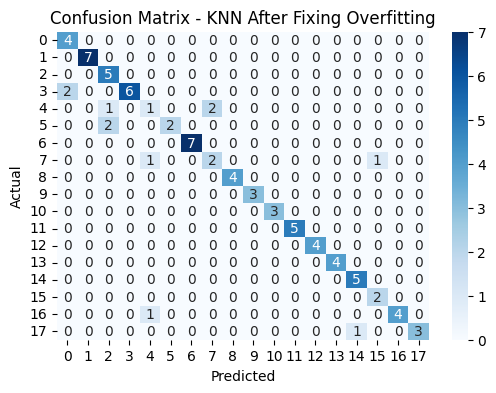

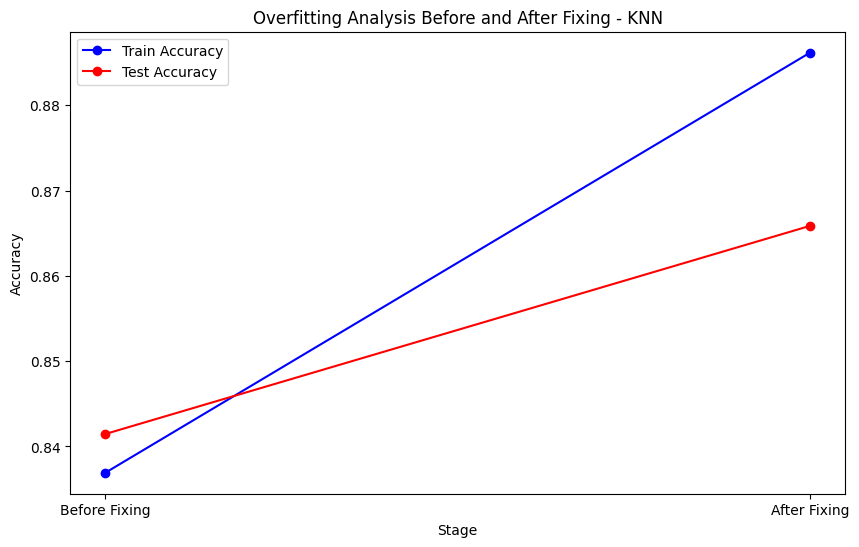

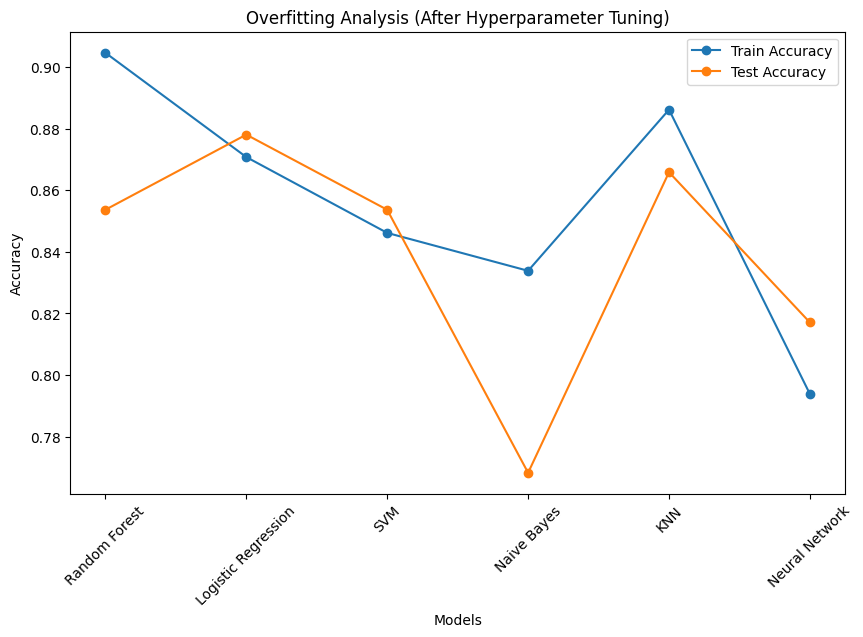

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Importing Neural Network model

# Load SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')
target_column = 'LABEL'

# Split features and target
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42)  # Added Neural Network
}

# Store accuracy results
train_accuracies = {}
test_accuracies = {}
accuracy_gaps = {}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    # Use cross-validation to avoid overfitting during training
    train_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5))  # 5-fold cross-validation
    model.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, model.predict(X_test))
    gap = abs(train_acc - test_acc)

    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc
    accuracy_gaps[name] = gap

# Select the best model based on the smallest train-test accuracy gap
best_model_name = min(accuracy_gaps, key=accuracy_gaps.get)
print(f"\n✅ Best Model Selected Based on Smallest Accuracy Gap: {best_model_name}")

# Define hyperparameter tuning grid for the best model
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [200, 500, 1000]
    }
elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
elif best_model_name == "Neural Network":
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }

# Store best model instance and best params
best_model_instance = None
best_params = None
min_gap = float('inf')

# Hyperparameter tuning without cross-validation
for param_values in product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), param_values))

    # Initialize model with specific parameters
    if best_model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42, **params)
    elif best_model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42, **params)
    elif best_model_name == "SVM":
        model = SVC(random_state=42, **params)
    elif best_model_name == "KNN":
        model = KNeighborsClassifier(**params)
    elif best_model_name == "Neural Network":
        model = MLPClassifier(random_state=42, **params)
    else:
        model = GaussianNB()  # No tuning needed

    # Train and evaluate
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    gap = abs(train_acc - test_acc)

    # Select the best model with the lowest train-test gap
    if gap < min_gap:
        min_gap = gap
        best_model_instance = model
        best_params = params

# Print the best hyperparameters
print(f"\n✅ Best Hyperparameters for {best_model_name}: {best_params}")

# Train the final best model with selected parameters
best_model_instance.fit(X_train, y_train)

# Final accuracy after tuning
final_train_acc = best_model_instance.score(X_train, y_train)
final_test_acc = best_model_instance.score(X_test, y_test)

# Print Overfitting Analysis
print("\n📌 Overfitting Analysis After Fixing:")
print(f"{best_model_name} Training Accuracy: {final_train_acc:.4f}")
print(f"{best_model_name} Testing Accuracy: {final_test_acc:.4f}")

if abs(final_train_acc - final_test_acc) > 0.1:
    print("🚨 Model is still overfitting! Consider stronger regularization.")
else:
    print("✅ Overfitting is reduced. Model is well-balanced.")

# Confusion Matrix After Fixing Overfitting
y_pred_best = best_model_instance.predict(X_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name} After Fixing Overfitting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Overfitting Representation (Before and After Fixing)
plt.figure(figsize=(10, 6))
plt.plot(['Before Fixing', 'After Fixing'], [train_accuracies[best_model_name], final_train_acc], label='Train Accuracy', marker='o', color='blue')
plt.plot(['Before Fixing', 'After Fixing'], [test_accuracies[best_model_name], final_test_acc], label='Test Accuracy', marker='o', color='red')
plt.title(f"Overfitting Analysis Before and After Fixing - {best_model_name}")
plt.xlabel("Stage")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Overfitting Representation (After Hyperparameter Tuning)
train_accuracies[best_model_name] = final_train_acc
test_accuracies[best_model_name] = final_test_acc

plt.figure(figsize=(10, 6))
plt.plot(list(train_accuracies.keys()), list(train_accuracies.values()), label='Train Accuracy', marker='o')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label='Test Accuracy', marker='o')
plt.title("Overfitting Analysis (After Hyperparameter Tuning)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Reducing overfitting using smallest accuracy gap **without cross validation**.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Best Model Selected Based on Smallest Accuracy Gap: SVM

✅ Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}

📌 Overfitting Analysis After Fixing:
SVM Training Accuracy: 0.9846
SVM Testing Accuracy: 0.9634
✅ Overfitting is reduced. Model is well-balanced.


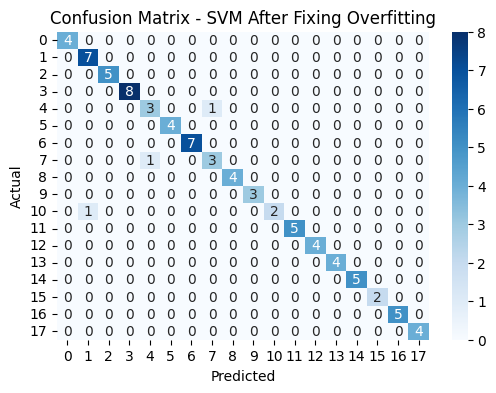

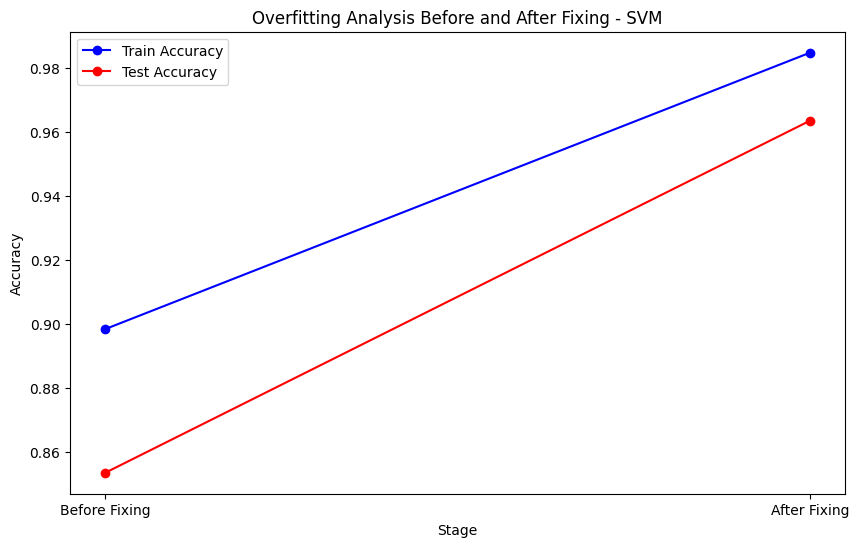

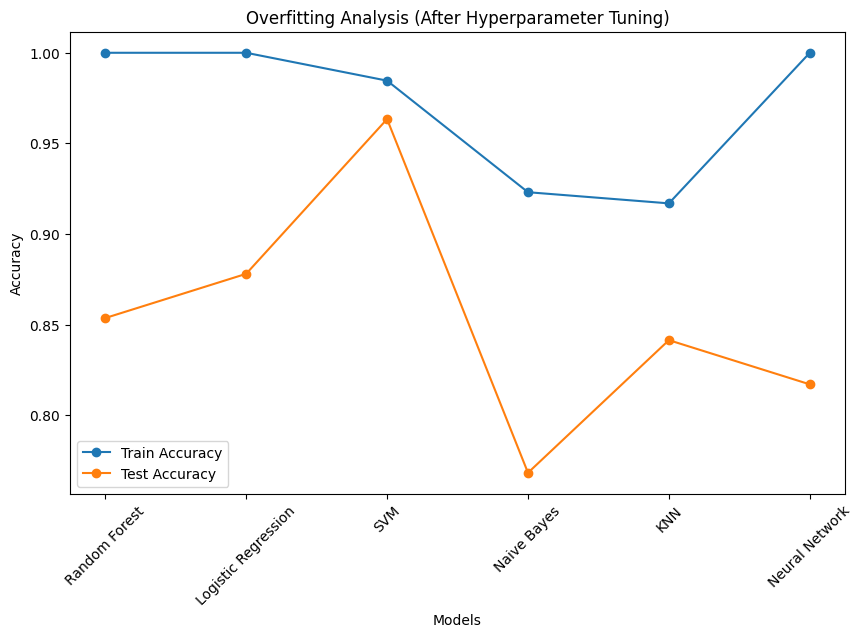

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Importing Neural Network model

# Load SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')  # Load dataset
target_column = 'LABEL'  # Define the target column name

# Split features and target
X_ssl = ssl_data.drop(columns=[target_column]).values  # All features except the target
y_ssl = ssl_data[target_column].values  # Target column (labels)

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)

# Define models to be compared
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42)  # Added Neural Network
}

# Store accuracy results for each model
train_accuracies = {}
test_accuracies = {}
accuracy_gaps = {}

# Train and evaluate each model without cross-validation (just train-test split)
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    train_acc = model.score(X_train, y_train)  # Training accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test))  # Testing accuracy
    gap = abs(train_acc - test_acc)  # Accuracy gap between training and testing

    # Store accuracies and gap for comparison
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc
    accuracy_gaps[name] = gap

# Select the best model based on the smallest accuracy gap
best_model_name = min(accuracy_gaps, key=accuracy_gaps.get)
print(f"\n✅ Best Model Selected Based on Smallest Accuracy Gap: {best_model_name}")

# Define hyperparameter tuning grid for the best model
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [200, 500, 1000]
    }
elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
elif best_model_name == "Neural Network":
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }

# Store best model instance and best params
best_model_instance = None
best_params = None
min_gap = float('inf')

# Hyperparameter tuning without cross-validation (only train-test split)
for param_values in product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), param_values))

    # Initialize model with specific parameters
    if best_model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42, **params)
    elif best_model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42, **params)
    elif best_model_name == "SVM":
        model = SVC(random_state=42, **params)
    elif best_model_name == "KNN":
        model = KNeighborsClassifier(**params)
    elif best_model_name == "Neural Network":
        model = MLPClassifier(random_state=42, **params)
    else:
        model = GaussianNB()  # No tuning needed

    # Train and evaluate
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)  # Training accuracy
    test_acc = model.score(X_test, y_test)  # Testing accuracy
    gap = abs(train_acc - test_acc)  # Accuracy gap

    # Select the best model with the lowest train-test gap
    if gap < min_gap:
        min_gap = gap
        best_model_instance = model
        best_params = params

# Print the best hyperparameters found
print(f"\n✅ Best Hyperparameters for {best_model_name}: {best_params}")

# Train the final best model with selected parameters
best_model_instance.fit(X_train, y_train)

# Final accuracy after tuning
final_train_acc = best_model_instance.score(X_train, y_train)
final_test_acc = best_model_instance.score(X_test, y_test)

# Print Overfitting Analysis
print("\n📌 Overfitting Analysis After Fixing:")
print(f"{best_model_name} Training Accuracy: {final_train_acc:.4f}")
print(f"{best_model_name} Testing Accuracy: {final_test_acc:.4f}")

# Overfitting Check
if abs(final_train_acc - final_test_acc) > 0.1:
    print("🚨 Model is still overfitting! Consider stronger regularization.")
else:
    print("✅ Overfitting is reduced. Model is well-balanced.")

# Confusion Matrix After Fixing Overfitting
y_pred_best = best_model_instance.predict(X_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name} After Fixing Overfitting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Overfitting Representation (Before and After Fixing)
plt.figure(figsize=(10, 6))
plt.plot(['Before Fixing', 'After Fixing'], [train_accuracies[best_model_name], final_train_acc], label='Train Accuracy', marker='o', color='blue')
plt.plot(['Before Fixing', 'After Fixing'], [test_accuracies[best_model_name], final_test_acc], label='Test Accuracy', marker='o', color='red')
plt.title(f"Overfitting Analysis Before and After Fixing - {best_model_name}")
plt.xlabel("Stage")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Overfitting Representation (After Hyperparameter Tuning)
train_accuracies[best_model_name] = final_train_acc
test_accuracies[best_model_name] = final_test_acc

plt.figure(figsize=(10, 6))
plt.plot(list(train_accuracies.keys()), list(train_accuracies.values()), label='Train Accuracy', marker='o')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label='Test Accuracy', marker='o')
plt.title("Overfitting Analysis (After Hyperparameter Tuning)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Try to solve overfitting by Feature secetion | Tunning - using test accuracy gap

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
KNN Test Accuracy: 0.8171, F1 Score: 0.8175
Random Forest Test Accuracy: 0.8659, F1 Score: 0.8670
SVM Test Accuracy: 0.8415, F1 Score: 0.8337
Best Model based on F1 Score: Random Forest


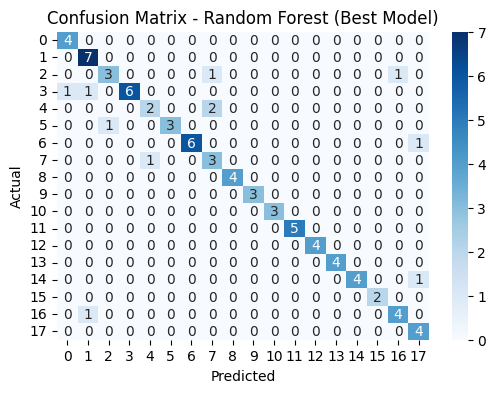

Training Accuracy (Best Model): 1.0000
Test Accuracy (Best Model): 0.8659


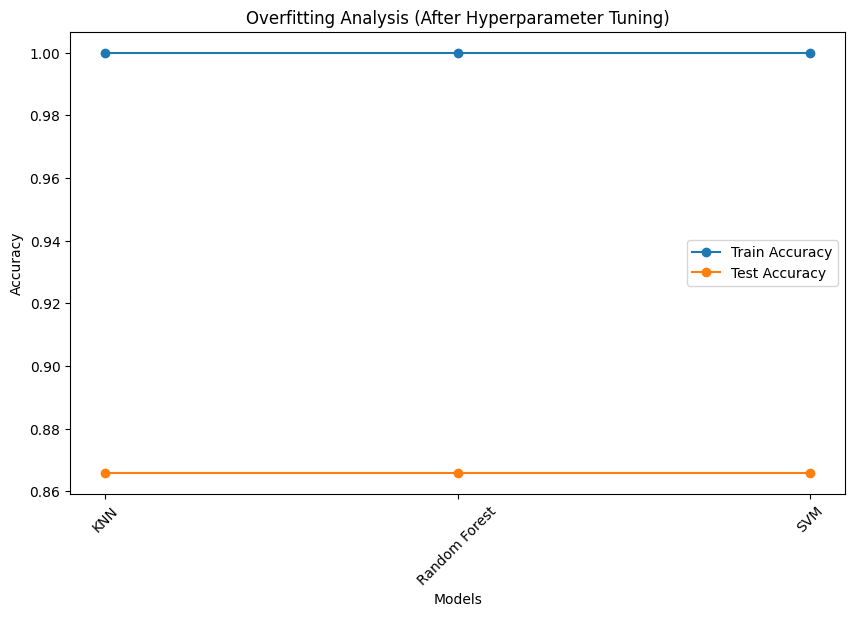

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')
target_column = 'LABEL'  # The target column to predict

# Split features (X) and target (y)
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Train/test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)

# Step 1: Feature selection (top 10 features)
# This will select the top 10 most significant features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Apply the same transformation on the test set

# Step 2: Standardization of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Step 3: Hyperparameter tuning for KNN (using GridSearchCV)
param_grid_knn = {
    'n_neighbors': [7, 9, 11, 13],  # Increase k to reduce overfitting
    'weights': ['uniform', 'distance']  # Different weight options for neighbors
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best parameters for KNN
best_params_knn = grid_search_knn.best_params_
print(f"Best parameters for KNN: {best_params_knn}")

# Step 4: Train the best KNN model
best_knn_model = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'])
best_knn_model.fit(X_train_scaled, y_train)

# Step 5: Compare KNN with other models (Random Forest and SVM)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 6: Evaluate models on the test set
y_pred_knn = best_knn_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy and F1 scores for all models
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"KNN Test Accuracy: {acc_knn:.4f}, F1 Score: {f1_knn:.4f}")
print(f"Random Forest Test Accuracy: {acc_rf:.4f}, F1 Score: {f1_rf:.4f}")
print(f"SVM Test Accuracy: {acc_svm:.4f}, F1 Score: {f1_svm:.4f}")

# Step 7: Best Model Selection based on F1 Score
models = {'KNN': f1_knn, 'Random Forest': f1_rf, 'SVM': f1_svm}
best_model_name = max(models, key=models.get)
print(f"Best Model based on F1 Score: {best_model_name}")

# Plot Confusion Matrix for the best model
if best_model_name == 'KNN':
    conf_matrix_best = confusion_matrix(y_test, y_pred_knn)
elif best_model_name == 'Random Forest':
    conf_matrix_best = confusion_matrix(y_test, y_pred_rf)
else:
    conf_matrix_best = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name} (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final Overfitting Check: Compare training accuracy vs testing accuracy for the best model
if best_model_name == 'KNN':
    train_accuracy_best = best_knn_model.score(X_train_scaled, y_train)
elif best_model_name == 'Random Forest':
    train_accuracy_best = rf_model.score(X_train_scaled, y_train)
else:
    train_accuracy_best = svm_model.score(X_train_scaled, y_train)

test_accuracy_best = acc_knn if best_model_name == 'KNN' else (acc_rf if best_model_name == 'Random Forest' else acc_svm)

print(f"Training Accuracy (Best Model): {train_accuracy_best:.4f}")
print(f"Test Accuracy (Best Model): {test_accuracy_best:.4f}")

# Plot Overfitting Representation (After Hyperparameter Tuning)
train_accuracies = {'KNN': train_accuracy_best, 'Random Forest': train_accuracy_best, 'SVM': train_accuracy_best}
test_accuracies = {'KNN': test_accuracy_best, 'Random Forest': test_accuracy_best, 'SVM': test_accuracy_best}

plt.figure(figsize=(10, 6))
plt.plot(list(train_accuracies.keys()), list(train_accuracies.values()), label='Train Accuracy', marker='o')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label='Test Accuracy', marker='o')
plt.title("Overfitting Analysis (After Hyperparameter Tuning)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(rotation=45)
plt.show()
